One of the biggest contention among different football clubs, and one which perpetuates into a lot of banter, is playing styles. In this blog post, we will try to quantify and visualize things which football fans keep talking about on the weekends - how much does Mourinho really park the bus, etc.

We'll be using a subset of the [European Soccer Dataset](https://www.kaggle.com/hugomathien/soccer) available on [Kaggle](http://kaggle.com/).

## Data Preparation

Let's start by taking a look at our data. The data for attributes of teams (playing styles) is given in the table Team_Attributes, while metadata about the team is in "Team" table.

In [2]:
import pandas as pd
import sqlite3

con = sqlite3.connect("./database.sqlite")
team=pd.read_sql_query('select * from Team',con)
team_attr=pd.read_sql_query('select * from Team_Attributes',con)
con.close()

In [3]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [4]:
team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


The team's attributes are constantly updated accross time, and we can access the historical record of their playing styles through the 'date' column. For now, we are interested in the most recent playing style of the teams. So, we'll merge these 2 tables and keep the latest attribute record for each team. Also, we'll remove the NaN entries and the unnecessary columns.

In [5]:
df = pd.merge(team, team_attr, how='inner', left_on='team_api_id', right_on='team_api_id')
aggs = df.groupby('team_long_name')['date'].max().to_frame()
#print aggs.loc[team_names]
df.drop('date', axis=1, inplace=True)
df.drop_duplicates(subset='team_long_name', keep='last', inplace=True)
df = df.merge(right=aggs, right_index=True, left_on='team_long_name', how='right')
df = df.dropna()
df.set_index('team_long_name', inplace=True)
df.drop(['date', 'id_x', 'id_y', 'team_api_id', 'team_fifa_api_id_y', 'team_fifa_api_id_x', 'team_short_name'], axis=1, inplace=True)
print (df.shape)

(260, 21)


In [6]:
df.columns

Index([u'buildUpPlaySpeed', u'buildUpPlaySpeedClass', u'buildUpPlayDribbling',
       u'buildUpPlayDribblingClass', u'buildUpPlayPassing',
       u'buildUpPlayPassingClass', u'buildUpPlayPositioningClass',
       u'chanceCreationPassing', u'chanceCreationPassingClass',
       u'chanceCreationCrossing', u'chanceCreationCrossingClass',
       u'chanceCreationShooting', u'chanceCreationShootingClass',
       u'chanceCreationPositioningClass', u'defencePressure',
       u'defencePressureClass', u'defenceAggression',
       u'defenceAggressionClass', u'defenceTeamWidth',
       u'defenceTeamWidthClass', u'defenceDefenderLineClass'],
      dtype='object')

So, we have a total of 260 clubs, with 21 attributes for each one. For now, we'll remove the categorical columns and focus only on the continuous ones.

In [7]:
cols_to_keep = [u'buildUpPlaySpeed', u'buildUpPlayDribbling',
         u'buildUpPlayPassing', u'chanceCreationPassing', u'chanceCreationCrossing',
       u'chanceCreationShooting', u'defencePressure', u'defenceAggression', u'defenceTeamWidth']
df = df[cols_to_keep]

## Looking at the data

Lets look at the data of some of the major clubs.

In [8]:
team_names = ['Liverpool', 'Manchester United', 'Arsenal', 'Chelsea', 'Real Madrid CF', 'FC Barcelona']
df.loc[team_names]

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_long_name,,,,,,,,,
Liverpool,66,60.0,45,34,34,46,51,52,61
Manchester United,38,42.0,44,49,44,40,54,53,56
Arsenal,59,51.0,30,28,44,46,51,44,52
Chelsea,67,41.0,36,41,34,44,39,41,46
Real Madrid CF,50,57.0,46,61,41,63,52,60,63
FC Barcelona,36,35.0,51,36,49,56,61,65,65


Let's visualize some of these attributes. We'll start with looking at attributes related to build up play.

### Build up play

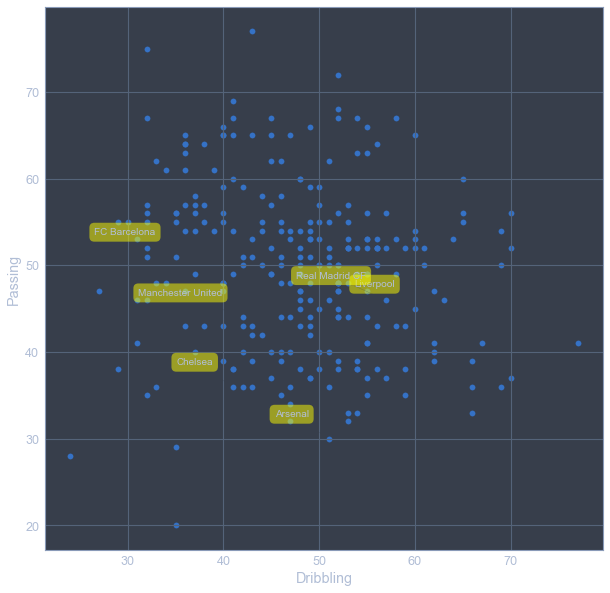

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)
team_maps = {}
for team in team_names:
    team_maps[team] = df.index.get_loc(team)

def plot(X, Y, xlabel, ylabel):    
    plt.figure()
    plt.scatter(X, Y)
    for i, x, y in zip(range(len(X)), X, Y): 
        if i in team_maps.values():
            for team in team_maps.items():
                if team[1]==i:
                    team_name = team[0]
            plt.annotate(team_name, xy=(x,y), xytext=(-20,20), textcoords='offset points', ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot(df['buildUpPlayDribbling'], df['buildUpPlayPassing'], 'Dribbling', 'Passing')

As can be seen, Chelsea and Arsenal seem to have poor dribbling and passing attributes (compared to the other famous clubs). They seem to counter this by having a "faster" playing style (the "buildUpPlaySpeed" attribute is high for both these clubs). Barcelona, as expected, has the highest value for build up passing.

Now, lets look at chance creation.

### Chance creation

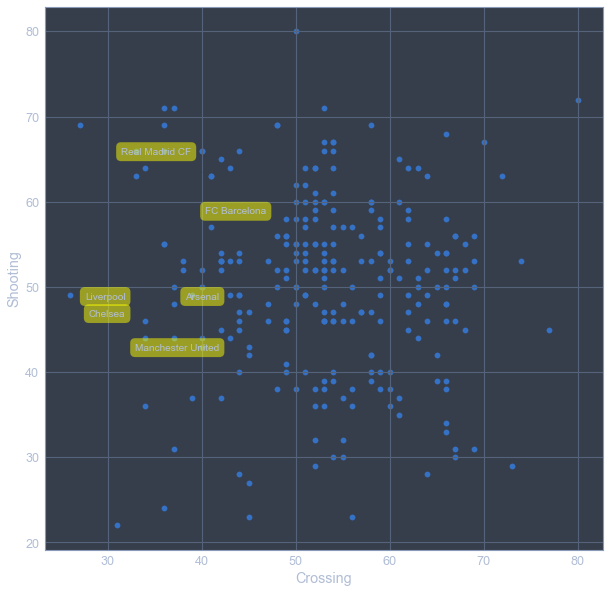

In [10]:
plot(df['chanceCreationCrossing'], df['chanceCreationShooting'], 'Crossing', 'Shooting')

As expected, Barcelona and Real Madrid have really good shooting metrics. Manchester United fares the worst here (I must mention, though, that these metrics are from 2015, and United's shooting has improved in the past year or so). The crossing metric is poor for all of them, which indicates either that all of them suck at crossing, or they rely very little on it.

## Dimensionality Reduction

In order to cluster these clubs based on their style of play, and visualize those clusters, we will have to reduce the data to 2D or 3D. This is where dimensionality reduction comes in. We'll try 2 methods for this - PCA and Multidimensional Scaling.

### PCA

Let's try two strategies - keeping two, and three components.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = df.copy()
x_normalized = StandardScaler().fit(x).transform(x)  

pca = PCA(n_components = 3).fit(x_normalized)
print (pca.explained_variance_ratio_)

[ 0.19677852  0.1868464   0.12810027]


Using PCA to reduce this data to 2D or 3D only makes sense if we can conserve majority of information contained in the original variables, but here we see that the first 2 eigenvalues (denoted by pca.explained_variance_ratio) only contain about 40% of the information, and the first 3 contain about 50% of the information.

Hence, trying to use PCA to reduce our dimensionality is futile. Let's try MDS.

### Multi Dimensional Scaling

Just like we did for PCA, we will need a metric to define how well MDS has represented our data in 2D or 3D. For PCA, we looked at the explained variance ratios (or the eigenvalues of the covariance matrix). MDS, on the other hand, tries to conserve the ratio of distances between 2 possible data points, in the original space and the reduced space.

In [12]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2, n_init = 10)
mds_2 = MDS(n_components = 3, n_init = 10)
x_mds = mds.fit_transform(x_normalized)
x_mds_2 = mds_2.fit_transform(x_normalized)

To evaluate the effectiveness of MDS, let's evaluate the coefficient of determination (i.e., R^2) metric for transforming our data to 2D and 3D.

## Clustering

Now that we have reduced our data to 2 and 3 dimensions, we can cluster and visualize the clubs based on the style of play. For clustering, we'll use the K means algorithm. To start with, I'm going to take 3 as an estimate for the number of clusters.

In [15]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
def plot_labelled_scatter(X, y, class_labels, team_maps):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)
    for i, x, y in zip(range(len(X[:,0])), X[:, 0], X[:, 1]):       
        if i in team_maps.values():
            for team in team_maps.items():
                if team[1] == i:
                    team_name = team[0]
                
            plt.annotate(
                team_name,
                #next(x[1] for x in ids_names if x[0]==i),
                xy=(x, y), xytext=(-20, 20),
                textcoords='offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

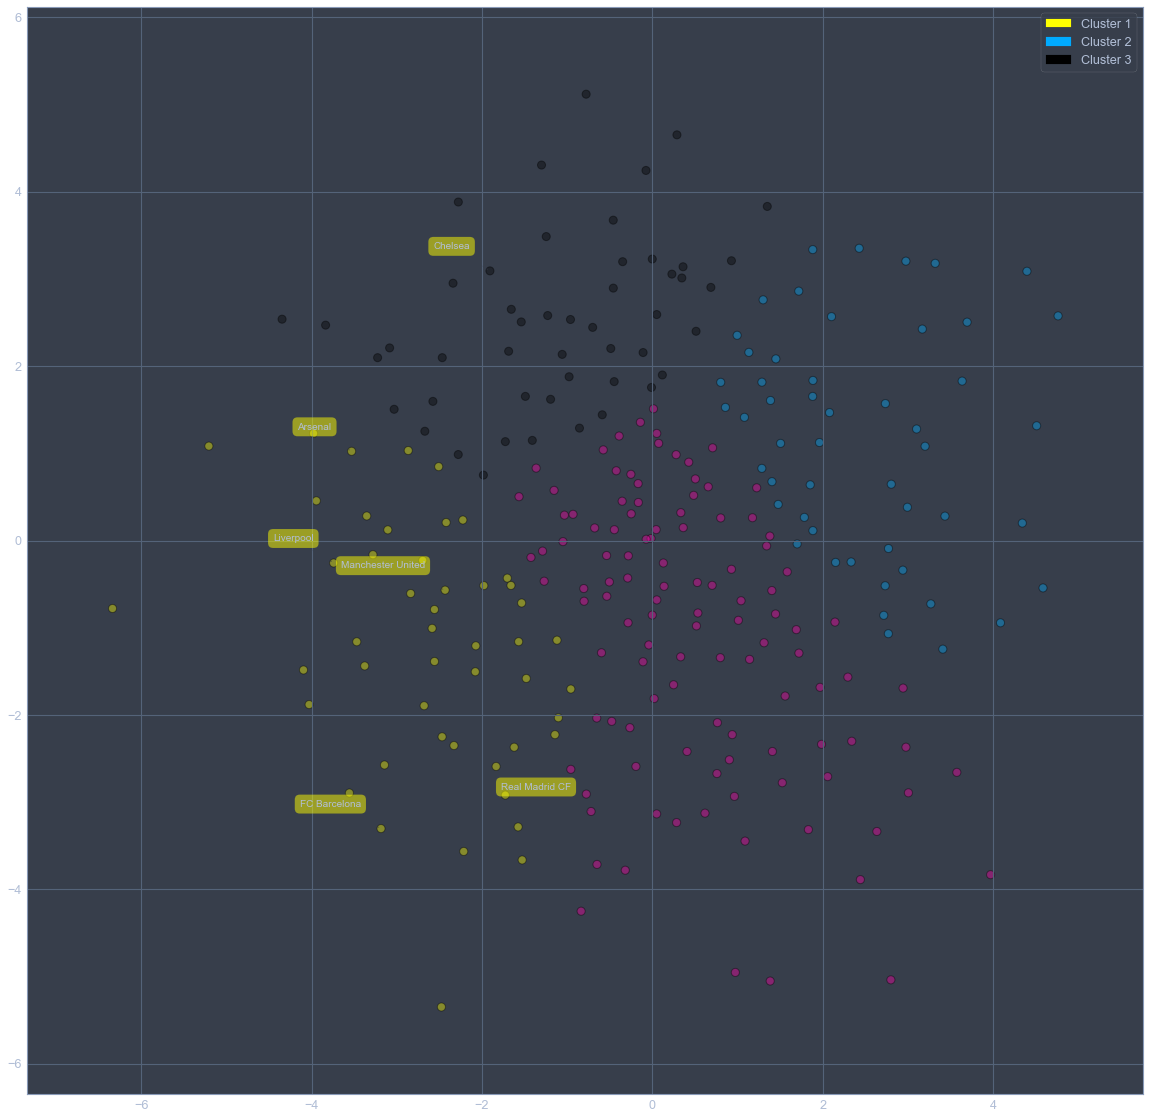

In [20]:
plt.rcParams['figure.figsize'] = (20,20)
kmeans = KMeans(n_clusters = 5, random_state=10)
kmeans.fit(x_mds)
plot_labelled_scatter(x_mds, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'], team_maps)

To evaluate the effectiveness of our clustering, we'll calculate the ratio of the "between group variance" and total variance. A good clustering should have a high ratio of this metric to ensure separatibility of clusters.

In [21]:
total_variance = x_mds.var()

In [22]:
total_variance

4.1362353314900684

In [23]:
kmeans.inertia_

610.65939188813877

In [25]:
kmeans2 = KMeans(n_clusters = 1, random_state=10)
kmeans2.fit(x_mds)
kmeans2.inertia_

2150.8423723748356